<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

In [1]:
## DATA UNDERSTANDING

In [2]:
# Import Library

In [3]:
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from datetime import datetime
# 2. Memuat Data
df = pd.read_csv("Report.csv")

In [4]:
# Menelaah Data dengan Metode Statistik

In [5]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,Outlet,Date,Time,Gross Sales,Discounts,Refunds,Net Sales,Gratuity,Tax,Total Collected,...,Other Note (Optional),Receipt Number,Collected By,Served By,Customer,Customer Phone,Items,Payment Method,Event Type,Reason of Refund
0,Cheesecake expert cempaka putih,31-01-2024,20:40:14,2055500.0,0.0,0.0,2055500.0,0.0,0.0,2055500.0,...,NaN,4Z7LUV,Adzrah Lubna,NaN,NaN,NaN,"Aditional Box x 65, Aditional Box, Baked Chees...",WhatsApp,Payment,NaN
1,Cheesecake expert cempaka putih,31-01-2024,20:06:15,19000.0,0.0,0.0,19000.0,0.0,0.0,19000.0,...,NaN,4Z7LUU,Adzrah Lubna,NaN,NaN,NaN,Americano (Long Black) (Hot),Cash,Payment,NaN
2,Cheesecake expert cempaka putih,31-01-2024,19:39:52,209000.0,0.0,0.0,209000.0,0.0,0.0,209000.0,...,NaN,4Z7LUT,Adzrah Lubna,NaN,NaN,NaN,Baked Cheesecake (BLUEBERRY BAKED CHEESECAKE W...,Bank Transfer,Payment,NaN
3,Cheesecake expert cempaka putih,31-01-2024,19:20:06,56000.0,0.0,0.0,56000.0,0.0,0.0,56000.0,...,NaN,4Z7LUS,Adzrah Lubna,NaN,NaN,NaN,"Signature Drink (Spanish Style Cocoa Ice), Bak...",Bank Transfer,Payment,NaN
4,Cheesecake expert cempaka putih,31-01-2024,19:10:06,138000.0,0.0,0.0,138000.0,0.0,0.0,138000.0,...,NaN,4Z7LUR,Adzrah Lubna,NaN,NaN,NaN,"Hazelnut Latte (Iced), Baked Cheesecake (SAN S...",Bank Transfer,Payment,NaN


In [6]:
# Mengetahui jumlah baris dan kolom
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Kolom : ", df.shape[1])

Jumlah Baris :  5465
Jumlah Kolom :  21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5465 entries, 0 to 5464
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Outlet                 5465 non-null   object 
 1   Date                   5465 non-null   object 
 2   Time                   5465 non-null   object 
 3   Gross Sales            5465 non-null   float64
 4   Discounts              5465 non-null   float64
 5   Refunds                5465 non-null   float64
 6   Net Sales              5465 non-null   float64
 7   Gratuity               5465 non-null   float64
 8   Tax                    5465 non-null   float64
 9   Total Collected        5465 non-null   float64
 10  Total Amount           5465 non-null   float64
 11  Other Note (Optional)  1 non-null      object 
 12  Receipt Number         5465 non-null   object 
 13  Collected By           5465 non-null   object 
 14  Served By              0 non-null      float64
 15  Cust

In [8]:
# Menampilkan statistik kolom baik yang bertipe numerik dan non numerik menggunakan fungsi describe
df.describe(include='all')

,Outlet,Date,Time,Gross Sales,Discounts,Refunds,Net Sales,Gratuity,Tax,Total Collected,...,Other Note (Optional),Receipt Number,Collected By,Served By,Customer,Customer Phone,Items,Payment Method,Event Type,Reason of Refund
count,5465,5465,5465,5.465000e+03,5465.000000,5465.000000,5.465000e+03,5465.0,5465.0,5.465000e+03,...,1,5465,5465,0.0,0.0,0.0,5465,5465,5465,35
unique,1,149,5109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,5430,4,NaN,NaN,NaN,2890,16,2,5
top,Cheesecake expert cempaka putih,20-01-2024,20:21:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6000 tambahan untuk varian,4Z7NK2,Adzrah Lubna,NaN,NaN,NaN,Baked Cheesecake (SAN SEBASTIAN CHEESECAKE ),Bank Transfer,Payment,Accidental Charge
freq,5465,89,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,2017,NaN,NaN,NaN,190,3142,5430,20
mean,NaN,NaN,NaN,1.014096e+05,433.268070,618.645929,1.003577e+05,0.0,0.0,1.003577e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.141638e+05,13581.835218,11537.781133,2.068362e+05,0.0,0.0,2.068362e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,-4.400000e+05,0.0,0.0,-4.400000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.990000e+04,0.000000,0.000000,3.990000e+04,0.0,0.0,3.990000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,7.400000e+04,0.000000,0.000000,7.400000e+04,0.0,0.0,7.400000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.130000e+05,0.000000,0.000000,1.130000e+05,0.0,0.0,1.130000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## Mendeteksi Outliers
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Gross Sales        73100.0
Discounts              0.0
Refunds                0.0
Net Sales          73100.0
Gratuity               0.0
Tax                    0.0
Total Collected    73100.0
Total Amount       73100.0
Served By              NaN
Customer               NaN
Customer Phone         NaN
dtype: float64

In [10]:
# Melihat batas bawah/minimum dari Interquartile Range (IQR)
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

Gross Sales       -69750.0
Discounts              0.0
Refunds                0.0
Net Sales         -69750.0
Gratuity               0.0
Tax                    0.0
Total Collected   -69750.0
Total Amount      -69750.0
Served By              NaN
Customer               NaN
Customer Phone         NaN
dtype: float64

In [11]:
# Melihat batas atas/maksimum dari Interquartile Range (IQR)
batas_atas = q3 + (1.5 * iqr)
batas_atas

Gross Sales        222650.0
Discounts               0.0
Refunds                 0.0
Net Sales          222650.0
Gratuity                0.0
Tax                     0.0
Total Collected    222650.0
Total Amount       222650.0
Served By               NaN
Customer                NaN
Customer Phone          NaN
dtype: float64

In [12]:
# Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_filter

,Gross Sales,Discounts,Refunds,Net Sales,Gratuity,Tax,Total Collected,Total Amount,Served By,Customer,Customer Phone
0,True,False,False,True,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5460,False,False,False,False,False,False,False,False,False,False,False
5461,True,False,False,True,False,False,True,True,False,False,False
5462,False,False,False,False,False,False,False,False,False,False,False
5463,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :

    # Exclude kolom dengan tipe data object
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: Gross Sales
Gross Sales
False    5151
True      314
Name: count, dtype: int64
-------------------
Nama Kolom: Discounts
Discounts
False    5357
True      108
Name: count, dtype: int64
-------------------
Nama Kolom: Refunds
Refunds
False    5430
True       35
Name: count, dtype: int64
-------------------
Nama Kolom: Net Sales
Net Sales
False    5134
True      331
Name: count, dtype: int64
-------------------
Nama Kolom: Gratuity
Gratuity
False    5465
Name: count, dtype: int64
-------------------
Nama Kolom: Tax
Tax
False    5465
Name: count, dtype: int64
-------------------
Nama Kolom: Total Collected
Total Collected
False    5134
True      331
Name: count, dtype: int64
-------------------
Nama Kolom: Total Amount
Total Amount
False    5134
True      331
Name: count, dtype: int64
-------------------
Nama Kolom: Served By
Served By
False    5465
Name: count, dtype: int64
-------------------
Nama Kolom: Customer
Customer
False    5465
Name: count, dtype: int64
--------------

In [14]:
# Melihat korelasi antara kolom
df.select_dtypes(exclude=['object']).corr()

,Gross Sales,Discounts,Refunds,Net Sales,Gratuity,Tax,Total Collected,Total Amount,Served By,Customer,Customer Phone
Gross Sales,1.000000,0.606358,-0.025394,0.997027,NaN,NaN,0.997027,0.997027,NaN,NaN,NaN
Discounts,0.606358,1.000000,-0.001711,0.562270,NaN,NaN,0.562270,0.562270,NaN,NaN,NaN
Refunds,-0.025394,-0.001711,1.000000,-0.081964,NaN,NaN,-0.081964,-0.081964,NaN,NaN,NaN
Net Sales,0.997027,0.562270,-0.081964,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
Gratuity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Collected,0.997027,0.562270,-0.081964,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
Total Amount,0.997027,0.562270,-0.081964,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
Served By,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

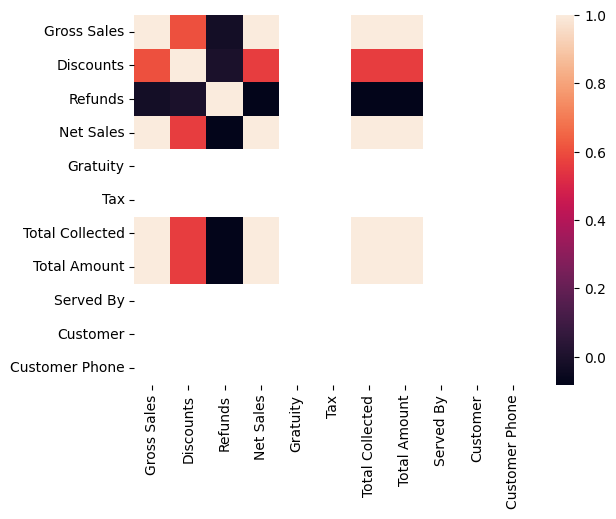

In [15]:
# Melihat korelasi dengan Seaborn heatmap
sns.heatmap(df.select_dtypes(exclude=['object']).corr())

In [16]:
## DATA PREPARATION

In [17]:
# Mengubah fortmat dan Membuang kolom dengan fungsi drop
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M:%S')

df.drop(['Date','Time','Outlet','Gross Sales','Refunds','Net Sales','Gratuity',	'Tax','Total Collected','Items','Event Type',
         'Other Note (Optional)','Receipt Number','Collected By', 'Served By','Customer','Customer Phone','Reason of Refund'],
        axis=1, inplace=True)

In [18]:
df['Discounts'] = df['Discounts'].astype(int)
df['Total Amount'] = df['Total Amount'].astype(int)
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [19]:
df.isna().sum()

Discounts         0
Total Amount      0
Payment Method    0
Datetime          0
dtype: int64

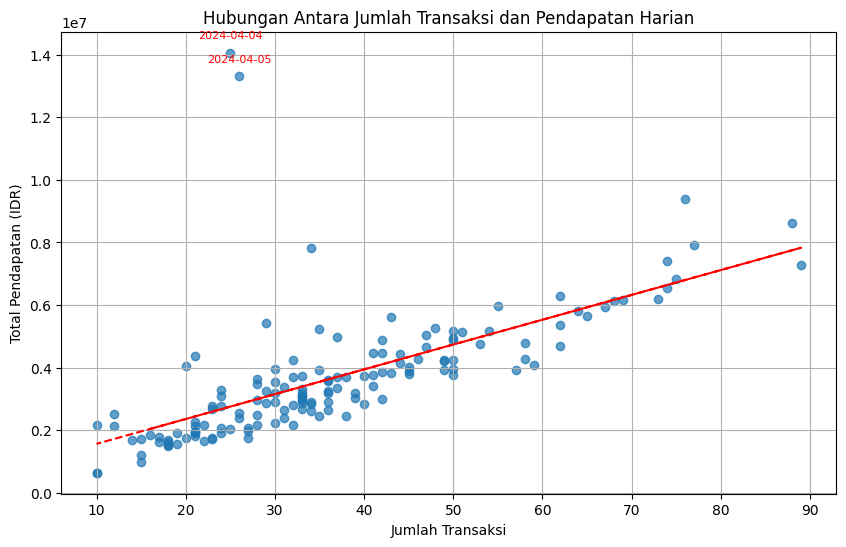

In [20]:
daily_df = df.groupby(df['Datetime'].dt.date).agg({'Total Amount': 'sum'}).reset_index()
daily_df['Transaction Count'] = df.groupby(df['Datetime'].dt.date).size().values

# Mengganti nama kolom 'Total Amount' menjadi 'Total Collected'
daily_df.rename(columns={'Total Amount': 'Total Collected', 'Datetime': 'Date'}, inplace=True)

# Membuat plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(daily_df['Transaction Count'], daily_df['Total Collected'], alpha=0.7)

# Menambahkan regresi polinomial untuk memperjelas tren
z = np.polyfit(daily_df['Transaction Count'], daily_df['Total Collected'], 1)
p = np.poly1d(z)
plt.plot(daily_df['Transaction Count'], p(daily_df['Transaction Count']), "r--")

# Menambahkan anotasi untuk nilai tertentu
for i, row in daily_df.iterrows():
    if row['Total Collected'] > 1.2e7:
        plt.annotate(f"{row['Date']}",
                     (row['Transaction Count'], row['Total Collected']),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=8,
                     color='red')

plt.title('Hubungan Antara Jumlah Transaksi dan Pendapatan Harian')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Total Pendapatan (IDR)')
plt.grid(True)
plt.show()

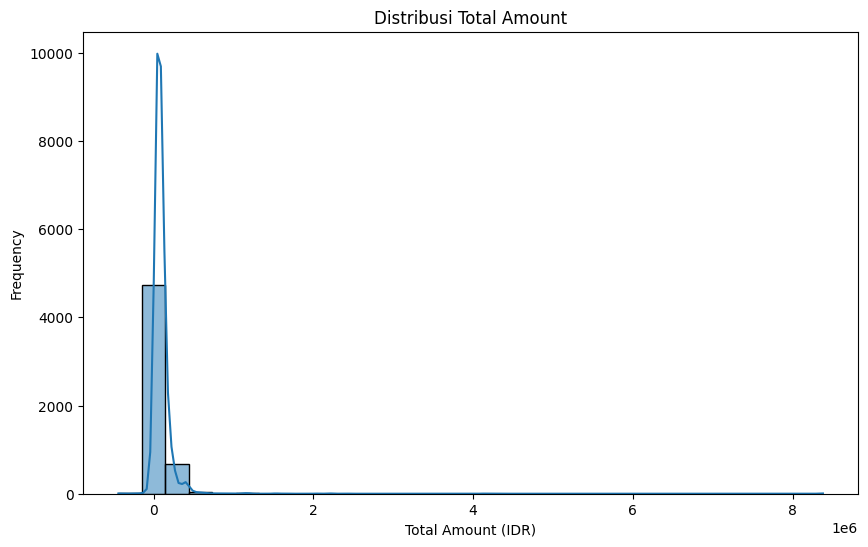

In [21]:
# Visualisasi Distribusi Total Collected
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], bins=30, kde=True)
plt.title('Distribusi Total Amount')
plt.xlabel('Total Amount (IDR)')
plt.ylabel('Frequency')
plt.show()

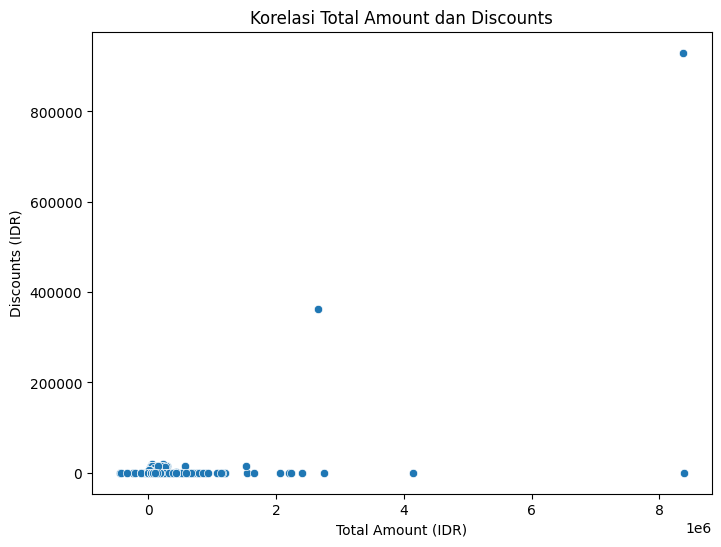

In [22]:
# Visualisasi Korelasi Total Amount dan Discounts
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Amount', y='Discounts', data=df)
plt.title('Korelasi Total Amount dan Discounts')
plt.xlabel('Total Amount (IDR)')
plt.ylabel('Discounts (IDR)')
plt.show()

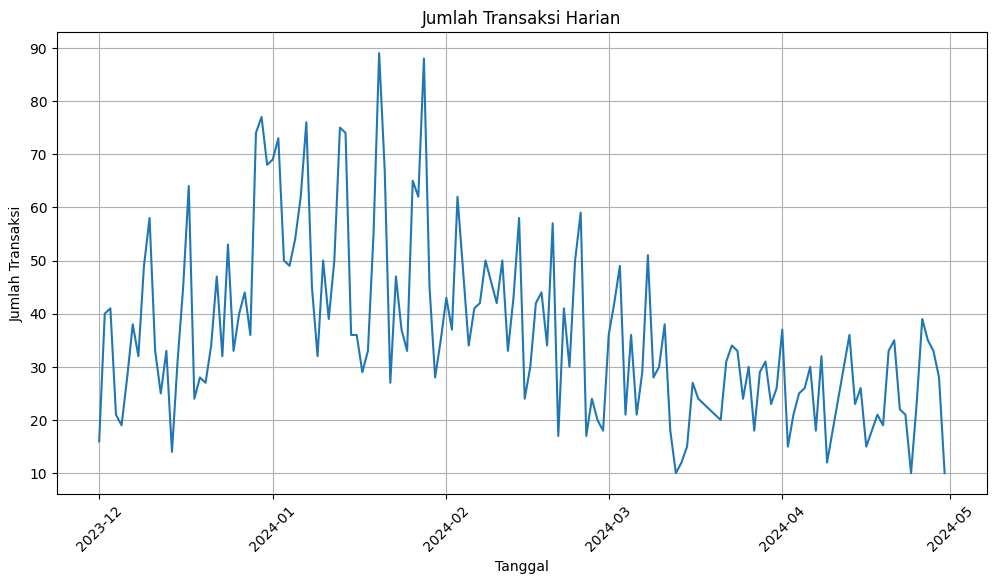

In [23]:
# Visualisasi Jumlah Transaksi per Hari
plt.figure(figsize=(12, 6))
plt.plot(daily_df['Date'], daily_df['Transaction Count'])
plt.title('Jumlah Transaksi Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

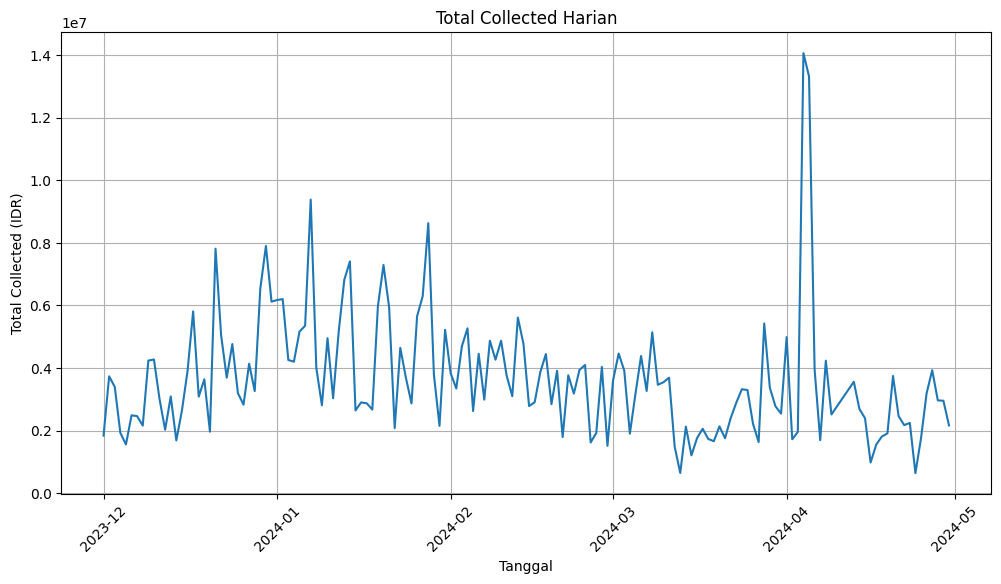

In [24]:
# Visualisasi Total Collected per Hari
plt.figure(figsize=(12, 6))
plt.plot(daily_df['Date'], daily_df['Total Collected'])
plt.title('Total Collected Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Collected (IDR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

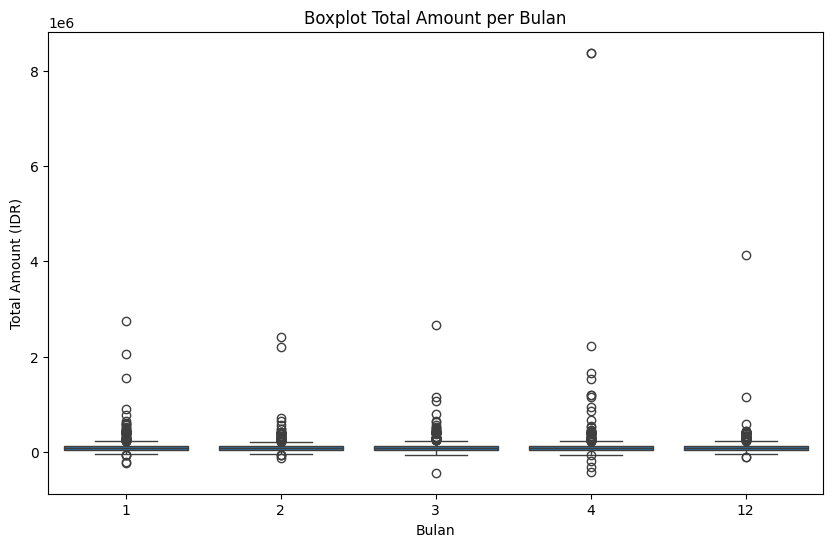

In [25]:
# Visualisasi Boxplot Total Amount per Bulan
df['Month'] = df['Datetime'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Total Amount', data=df)
plt.title('Boxplot Total Amount per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Amount (IDR)')
plt.show()

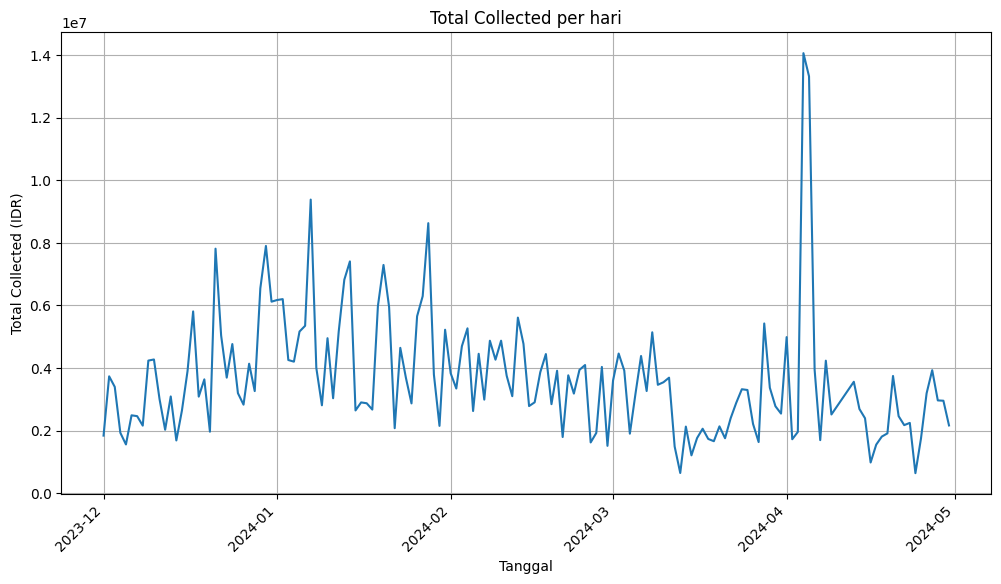

In [26]:
# Line plot Total Collected per hari
plt.figure(figsize=(12, 6))
plt.plot(daily_df['Date'], daily_df['Total Collected'])
plt.title('Total Collected per hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Collected (IDR)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

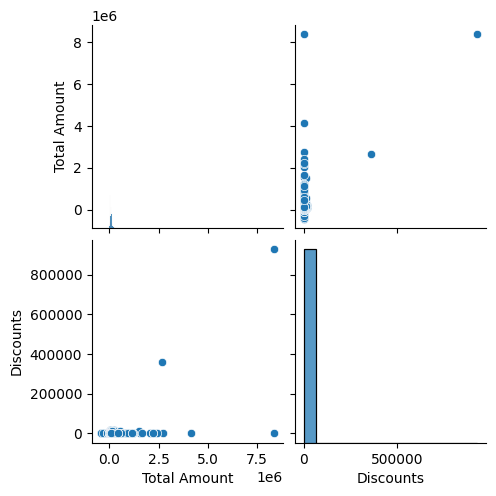

In [27]:
# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(df[['Total Amount', 'Discounts']])
plt.show()